In [4]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns


In [5]:
1944/12

162.0

In [6]:
#####new340-500.out

years = [f"{x:04d}" for x in range(0,1944)]
ii =0
result = np.zeros(1944)

for yy in years:
    data1=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air500/TAUX/CESM_TAU_'+yy+'_.nc')
    TAUX1 = data1.variables['TAUX'][0,60:200,-200:]
    TAUX2 = data1.variables['TAUX'][0,60:200,:120]
    TAUX = np.hstack((TAUX1,TAUX2))
    TT2 = np.mean(TAUX,axis=1)
    LAT = data1.variables['lat'][60:200]
    result[ii] = LAT[np.where(TT2<0)[0][0]]
    #result[ii] = LAT[np.where(TT2[:] == np.nanmin(TT2[:]))]
    ii = ii + 1

In [7]:
ww222 = np.convolve(result, np.ones((60,))/60, mode='valid')
mean = np.nanmean(ww222)

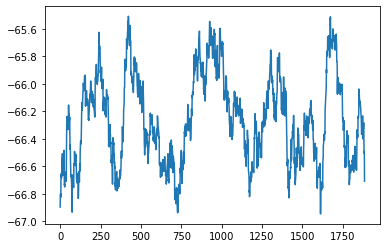

In [8]:
plt.plot(ww222)

In [3]:
# 20-330
years = [f"{x:04d}" for x in range(0,3719)]
ii =0
result2 = np.zeros(3719)

for yy in years:
    data1=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air500/TAUX300/CESM_TAU_'+yy+'_.nc')
    TAUX1 = data1.variables['TAUX'][0,60:200,-200:]
    TAUX2 = data1.variables['TAUX'][0,60:200,:120]
    TAUX = np.hstack((TAUX1,TAUX2))
    TT3 = np.mean(TAUX,axis=1)
    LAT = data1.variables['lat'][60:200]
    result2[ii] = LAT[np.where(TT3<0)[0][0]]
    #result2[ii] = LAT[np.where(TT3[:,:] == np.nanmin(TT3[:,:]))[0][0]]
    #result2[ii] = LAT[np.where(TT3[:] == np.nanmin(TT3[:]))]
    ii = ii + 1

In [4]:
years = [f"{x:04d}" for x in range(0,96)]
ii =0
result5 = np.zeros(96)
# here PSL is TAUX !!!!!!!
for yy in years:
    data1=nc.Dataset('/scratch/user/xiliangdiao/firstpaper/TAUX/CESM_PSL_'+yy+'_.nc')
    TAUX1 = data1.variables['PSL'][0,60:200,-200:]
    TAUX2 = data1.variables['PSL'][0,60:200,:120]
    TAUX = np.hstack((TAUX1,TAUX2))
    TT5 = np.mean(TAUX,axis=1)
    LAT = data1.variables['lat'][60:200]
    result5[ii] = LAT[np.where(TT5<0)[0][0]]
    #result5[ii] = LAT[np.where(TAUX[:,:] == np.nanmin(TAUX[:,:]))[0][0]]
    #result5[ii] = LAT[np.where(TT5[:] == np.nanmin(TT5[:]))]
    ii = ii + 1


In [5]:
hh = np.hstack((result2,result5))
hh2 = np.hstack((hh,result))

In [6]:
ww222 = np.convolve(hh2, np.ones((60,))/60, mode='valid')
mean = np.nanmean(ww222)

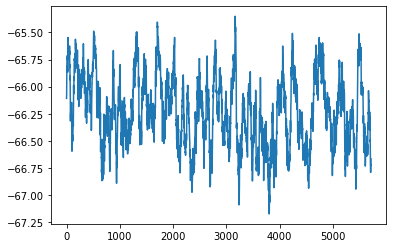

In [7]:
plt.plot(ww222)

In [8]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

In [9]:
wspxx = wspxx*12
mrpxx = mrpxx*12
noxx = noxx*12

In [10]:
list_before = wspxx
list_after = [val for val in list_before for i in range(12)]

In [11]:
xxx = np.reshape(list_after,(106,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

In [12]:
list_before = mrpxx
list_after = [val for val in list_before for i in range(12)]

In [13]:
mrpxxx = np.reshape(list_after,(216,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

In [14]:
list_before = noxx
list_after = [val for val in list_before for i in range(12)]
noxxx = np.reshape(list_after,(134,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

([<matplotlib.axis.XTick at 0x7fe96d437780>,
 <a list of 18 Text xticklabel objects>)

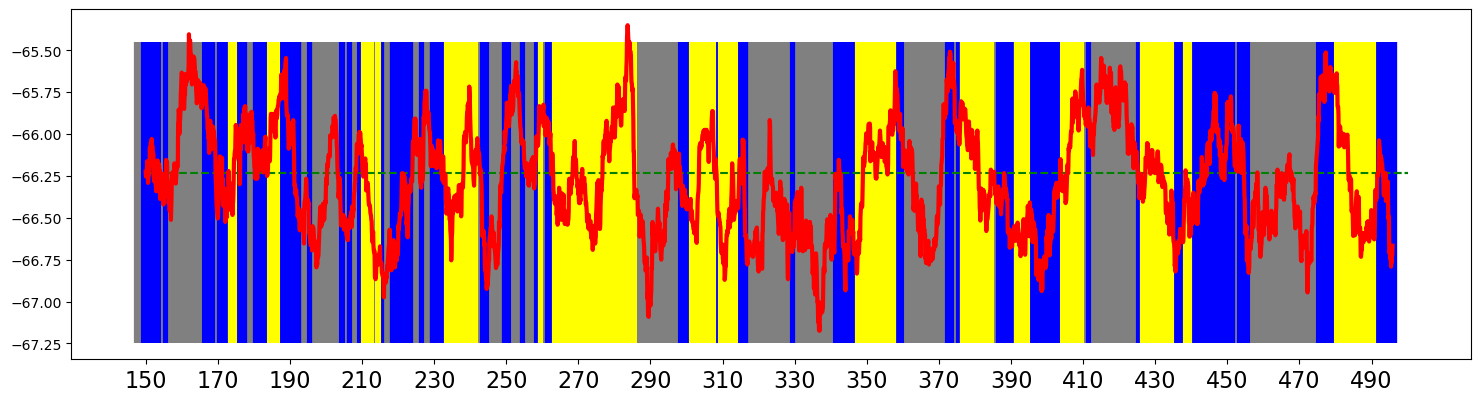

In [17]:
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(ww222[1560:],'red',linewidth=3)
#ax0.plot(0.0001*result,'red',linewidth=3)
plt.hlines(mean, 0, 4200, colors = "g",linestyles = "dashed")
#########################################
plt.vlines(noxxx, -67.25, -65.45, colors = "grey")
plt.vlines(mrpxxx,   -67.25, -65.45, colors = "blue")
plt.vlines(xxx,   -67.25, -65.45, colors = "yellow")
plt.hlines(mean, 0, 4200, colors = "g",linestyles = "dashed")
plt.xticks(range(0,4200,240), ['150', '170', '190', '210','230','250','270','290','310','330','350', '370', '390', '410','430','450','470','490','500'],**my_font)
#ax0.set(ylim=(-49, -52.5),xlim=(0, 4170))